# Figures for external validation

Because I don't know how to use ggplot and have to do things in Python

In [5]:
import pandas as pd
import sys
import os
sys.path.append('../../code')
from style import set_style
from plotting import plot_regression_results
set_style('../../style.mplstyle')
import matplotlib.pyplot as plt

Font Heebo already available in Matplotlib.
Matplotlib style set to: ../../style.mplstyle with font Heebo


## Load regression summaries

In [2]:
predicted_scores = pd.read_csv('../../data/regressions/RouaultFactorReg_predictedScores.csv')
original_scores = pd.read_csv('../../data/regressions/RouaultFactorReg_originalScores.csv')

predicted_scores.head()

,Estimate,StdError,t value,Pr(>|t|),Label,Type
0,0.027974,0.054319,0.514994,0.606790,Accuracy,Anxious
1,0.028586,0.050695,0.563871,0.573101,Accuracy,Compulsivity
2,-0.061288,0.054105,-1.132754,0.257873,Accuracy,Social Withdrawal
3,-0.173912,0.052542,-3.309927,0.001002,Confidence Level,Anxious
4,0.193503,0.049038,3.946028,0.000091,Confidence Level,Compulsivity


In [3]:
# rename Pr(>|t|) in predicted scores to Pr...t..
predicted_scores = predicted_scores.rename(columns={'Pr(>|t|)': 'Pr...t..'})

# Drop "Label" values except those in original scores
predicted_scores = predicted_scores[predicted_scores['Label'].isin(original_scores['Label'])]

# Replace "Anxious" with "Anxious Depression" in the "Type" columns of both dataframes
predicted_scores = predicted_scores.replace({'Anxious': 'Anxious Depression'})
original_scores = original_scores.replace({'Anxious': 'Anxious Depression'})

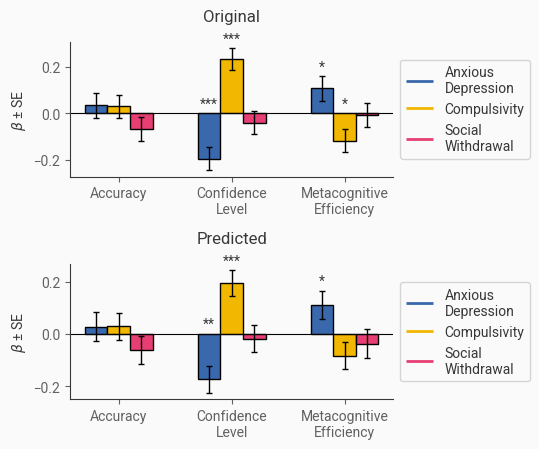

<Figure size 512x384 with 0 Axes>

In [6]:
plot_regression_results([original_scores, predicted_scores], titles=['Original', 'Predicted'])

# Save
plt.savefig('../../figures/regression_results.png', dpi=300, bbox_inches='tight')